# Mount to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [2]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Sep  5 05:22 .
drwxr-xr-x 1 root root 4096 Sep  5 05:19 ..
drwxr-xr-x 4 root root 4096 Aug 31 13:24 .config
drwx------ 6 root root 4096 Sep  5 05:22 drive
drwxr-xr-x 1 root root 4096 Aug 31 13:25 sample_data


In [3]:
%cd "/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/03_week3"

!pwd; ls -la

/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/03_week3
/content/drive/Othercomputers/isaac_mac_pro/diffusion_model_course/03_week3
total 139622
-rw------- 1 root root      2396 Sep  5 05:03 diffusion_model.py
-rw------- 1 root root      3042 Sep  5 05:21 inpainting.ipynb
-rw------- 1 root root 142953149 Sep  5 04:44 model_paper2_epoch_39999
drwx------ 2 root root      4096 Sep  5 04:39 __pycache__
-rw------- 1 root root      8877 Sep  5 04:55 unet.py


# Import necessary libraries

In [4]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from keras.datasets.mnist import load_data

from unet import UNet
from diffusion_model import DiffusionModel
import matplotlib.pyplot as plt

# Read MNIST data

In [5]:
(trainX, trainy), (testX, testy) = load_data()
trainX = np.float32(trainX) / 255.
testX = np.float32(testX) / 255.

def sample_batch(batch_size, device):
    indices = torch.randperm(trainX.shape[0])[:batch_size]
    data = torch.from_numpy(trainX[indices]).unsqueeze(1).to(device)
    return torch.nn.functional.interpolate(data, 32)

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
device = 'cuda'
model = torch.load('model_paper2_epoch_39999').to(device)
diffusion_model = DiffusionModel(1000, model, device)

# Forward processing

In [12]:
def forward(diffusion_model, t, x0):

  mu = torch.sqrt(diffusion_model.alpha_bar[t - 1]) * x0
  std = torch.sqrt(1 - diffusion_model.alpha_bar[t])

  return mu + torch.randn_like(x0) * std
x0 = sample_batch(2, device)
x500 = forward(diffusion_model, 500, x0)


In [16]:
print('x0 shape {}'.format(x0.shape))

x0 shape torch.Size([2, 1, 32, 32])


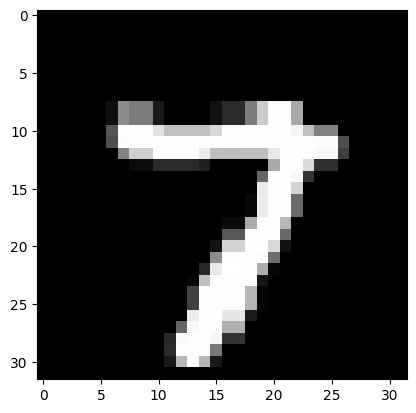

In [20]:
plt.imshow(x0[0, 0].data.cpu().numpy(), cmap = 'gray')

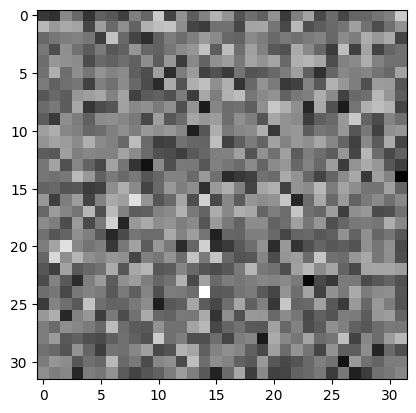

In [21]:
plt.imshow(x500[0, 0].data.cpu().numpy(), cmap = 'gray')

# Reverse processing

In [22]:
samples = diffusion_model.sampling(n_samples=1, use_tqdm=False)

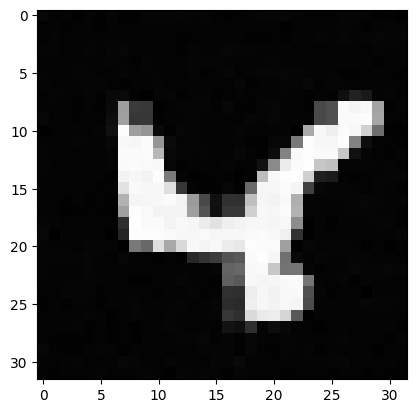

In [24]:
plt.imshow(samples[0, 0].data.cpu().numpy(), cmap = 'gray')